# Практическая работа №3: Статистический анализ социальных сетей.
Выполнил студент гр. 0381 Магнитов Сергей. Вариант № 11

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** - элемент сети, представляющий собой пару акторов и (возможную) связь между ними
$$D_{ij}=(X_{ij}, X_{ji}), i \neq j$$

Виды диад:

Взаимная диада: $D_{ij}=(1, 1)$

Асимметричная диада: $D_{ij}=(1, 0), D_{ij}=(0, 1)$

Нулевая диада: $D_{ij}=(0, 0)$

**Цензус диад** $-$ тройка чисел $<M, A, N>$, где
$M=\sum_{i<g}X_{ij}X_{ji}  \: -$ количество взаимных диад
$A=X_{++}-2M  \: -$ количество асимметричных диад
$N=\Large{\binom{g}{2}}$$-A-M-$количество нулевых диад

**Индекс взаимности Каца-Пауэлла** - характеристика измерения тенденции акторов в группе:
$$-\inf<p_{KP}\leq1$$
Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом.


  **Индекс взаимности Бандиопадхьяйя**


 Данный индекс основан на минимальном и максимальном значениях количества взаимных диад.
Значение индекса:


$p_{B}=\frac{M-M^{min}}{M^{max}-M^{min}}$

Функция$\: f(t):$

$f(t)=\sum_{i=1}^{t}x_{i+}-t(g-1)-\binom{t}{2}$

Функция$\: g(t):$

$g(t)=\sum_{i=1}^{t}x_{i+}-t(t-1)-\sum_{i=t+1}^{g}min(t,x_{i+})$


   **Статистический анализ количества дуг**
   
   Число дуг: $\: L\sim B(g,(g-1),1/2) $

  Вероятность того, что число дуг в орграфе равно $L$:

   $\:P(L=I)=\Large \binom{g(g-1)}{I}$$2^{g(1-g)}$
  Математическое ожидание: $\: E(L)=\Large \binom{g}{2} $

  Дисперсия: $\: D(L)=\Large 1/2\binom{g}{2} $










## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [ ]:
install.packages('igraph')
install.packages('network')
install.packages('sna')
install.packages('HyperG')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘statnet.common’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppEigen’, ‘mclust’, ‘proxy’, ‘RSpectra’, ‘gtools’




In [ ]:
library(network)
library(igraph)
library(sna)
library(HyperG)


‘network’ 1.18.0 (2022-10-05), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information



Attaching package: ‘igraph’


The following objects are masked from ‘package:network’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: statnet.common


Attaching package: ‘statnet.common’


The following objects are masked from ‘package:base’:

    attr, order


sna: Tools for Social Network Analysis
Version 2.7 created on 2022-05-09.
copyright (c) 2005, Carter T. Butts, University of

## 1. Смоделировать случайный орграф $\mathscr{G}_{d}$ на основе модели Эрдеша—Реньи: $\mathscr{G}_{d}=\mathscr{G}(g, p)$, где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами.

g=67, p=0.52, P0 = 0.68, alpha = 0.03

In [15]:
g <- 67
p <- 0.52
P0 <- 0.68
alf <- 0.03
my_graph <- erdos.renyi.game(g, p, directed=TRUE)

## 2. Отобразить полученный граф.

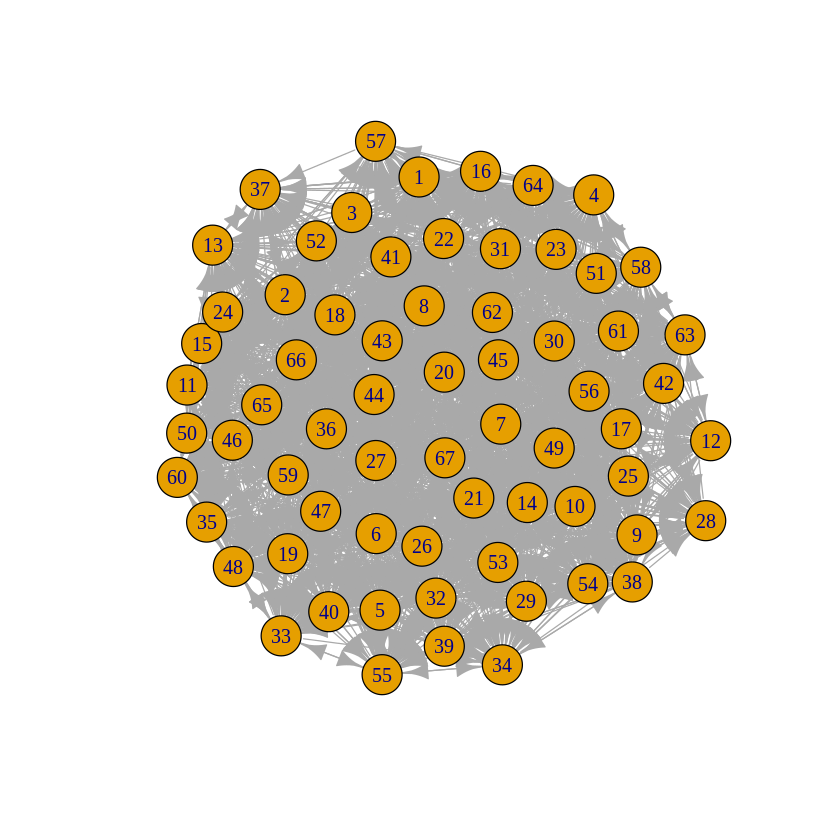

In [16]:
l <- layout.fruchterman.reingold(my_graph)
plot(my_graph, layout=l)

## 3. Вычислить "пятичисловую сводку" для графа.

In [20]:
my_network <- as.network(as.matrix(my_graph, "edgelist"), directed=TRUE)

print(paste('Размер сети:', network.size(my_network)))
print(paste('Плотность сети:', gden(my_network, mode="graph")))
print(paste('Компоненты сети:', components(my_network)))
print(paste('Диаметр: ', max(geodist(my_network)$gdist)))
print(paste('Коэффициент кластеризации: ', gtrans(my_network, mode = "graph")))

[1] "Размер сети: 67"
[1] "Плотность сети: 0.528720036182723"
[1] "Компоненты сети: 1"
[1] "Диаметр:  2"
[1] "Коэффициент кластеризации:  0.527643137499221"


##4. Вычислить цензус диад.

In [18]:
cens <- dyad_census(my_graph)
print(paste('mut:', cens$mut))
print(paste('asym:', cens$asym))
print(paste('null:', cens$null))

[1] "mut: 612"
[1] "asym: 1114"
[1] "null: 485"


Вывод: В графе мало пар акторов, между которыми отсутствует связь, по сравнению с остальными, поскольку большинство акторов имеет хотя бы одностороннюю связь.

##5. Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе.

In [49]:
mu <- dyad_census(my_graph)$mut
fix <- (2*(g-1)*mu - g*30*30)/(g*30*(g-1-30))
print(fix)

mu <- dyad_census(my_graph)$mut
L <- sum(igraph::degree(my_graph, mode="in"))
L_2 <- sum(igraph::degree(my_graph, mode="in")^2)
free <- (2*(g-1)^2*mu-L^2+L_2)/(L*(g-1)^2-L^2+L_2)
print(free)


[1] 0.2830846
[1] -0.01076717


Вывод: При свободном выборе акторы образуют меньше взаимных связей по сравнению с фиксированном выбором.

## 6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [52]:
fix6 <- (33 / (g-1)) * ((33/(g-1)) + fix*(g - 1 - 33) / (g - 1))
print(fix6)
free6 <- (rowSums(matr) * colSums(matr))/(g - 1)^2
free_res <- sum(free6)/g
print(free_res)


[1] 0.3207711
[1] 0.2791792


## 7. Вычислить индекс взаимности Бандиопадхьяйя.

In [63]:
reciprocity(my_graph)
grecip(my_network)

[1] 0.5235244

Mut 
0.4961556

Вывод: Результат примерно совпадает со значением, относительно которого генерировался граф.

## 8. Проверить нулевую гипотезу о том, что число дуг L в орграфе $\mathscr{G}_{d}$ имеет биномиальное распределение $L \sim Bin(g(g-1), 1/2)$ при уровне значимости $α$.

In [23]:
matr <- as.matrix(as_adjacency_matrix(my_graph))
l <- sum(matr)
binom.test(l, g*(g-1), 0.5)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 2338, number of trials = 4422, p-value =
0.0001415
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.5138794 0.5435227
sample estimates:
probability of success 
               0.52872 


Вывод: Так как p-value=0.00014 меньше чем alpha = 0.03, а это значит, что гипотеза отвергается. 

## 9. Проверить нулевую гипотезу о том, что число дуг L в орграфе $\mathscr{G}_{d}$ имеет биномиальное распределение $L \sim Bin(g(g-1), P_0)$ при уровне значимости $α$.

In [24]:
binom.test(l, g*(g-1), P0)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 2338, number of trials = 4422, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.68
95 percent confidence interval:
 0.5138794 0.5435227
sample estimates:
probability of success 
               0.52872 


Вывод: Так как p-value=2.2е-16 меньше чем alpha = 0.03, а это значит, что гипотеза отвергается. 

## 10. Построить доверительный интервал для оценки параметра p с доверительной надёжностью $(1-α)$. Сделать выводы.

In [42]:
estimation <- (sum(matr))/(g*(g-1))

q <- qnorm(1 - (alf/2), 0, 1)

a1 <- estimation - q * sqrt((estimation * (1 - estimation))/(g * (g - 1)))
a2 <- estimation + q * sqrt((estimation * (1 - estimation))/(g * (g - 1)))
print(a1)
print(a2)                      

[1] 0.51243
[1] 0.54501


Вывод: P(0.51<p<0.54)=0.97

## Выводы

В ходе выполнения практической работы был сгенерирован случайный ориентированный граф, который был изображен далее. Для полученного графа вычислены следующие значения: пятичисловая сводка, цензус диад, индексы Каца—Пауэла и Бандиопадхьяйя. Были исследованы гипотезы о биномиальном распределении, а также построен доверительный интервал.